In [2]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load data

In [135]:
images = np.expand_dims(np.load("muons_384_1.05_4gasgap_ALL.npy"), -1)
labels = 1*(np.load("labels_384_1.05_4gasgap_ALL.npy")[:, 0] >10)
etaPt = np.load("labels_384_1.05_4gasgap_ALL.npy")
train_split = 0.8
images_train, images_test, labels_train, labels_test, etaPt_train, etaPt_test,  = train_test_split(images, labels, etaPt, test_size = 1-train_split, random_state=0) # 80%/20% train/test spli


# Visualization

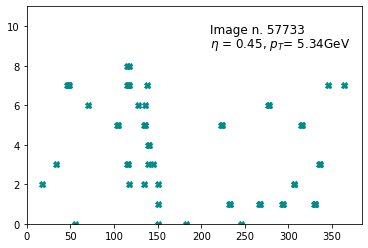

In [141]:
index = np.random.randint(len(labels_train))
cohord = np.array([[i, j] for i in range(len(images_train[index])) for j in range(len(images_train[index][i])) if images_train[index][i][j] != 0])
cohord
fig = plt.figure()
plt.plot(cohord[:,1], cohord[:,0], marker = "X",  color = 'darkcyan', linestyle = '')
plt.text(0.55, 0.8, "Image n. " + str(index) , fontsize=12,
        verticalalignment='center', transform = fig.transFigure)
plt.text(0.55, 0.75, "$\eta$ = " + str(round(etaPt_train[index,1], 2)) + ", $p_T$= " + str(round(etaPt_train[index,0], 2)) + "GeV", fontsize=12,
        verticalalignment='center', transform = fig.transFigure)
plt.xlim([0,384])
plt.ylim([0,11])
plt.show()

# Model definition

In [148]:
inputs = tf.keras.layers.Input(shape = images_train[0].shape)
x = tf.keras.layers.Conv2D(16, (5, 5), padding='same', activation = "relu", name = "conv1")(inputs)
x = tf.keras.layers.MaxPooling2D((2, 4), name = "pool1")(x)
x = tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation = "relu", name = "conv2")(x)
x = tf.keras.layers.MaxPooling2D((2, 4), name = "pool2")(x)
x = tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation = "relu", name = "conv3")(x)
x = tf.keras.layers.MaxPooling2D((2, 4), name = "pool3")(x)
x = tf.keras.layers.Flatten()(x)

x = tf.keras.layers.Dense(128, activation = "relu", name = "dense1")(x)
output = tf.keras.layers.Dense(1, activation = "sigmoid", name = "output")(x)

model = tf.keras.Model(inputs = inputs, outputs = output)
model.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_17 (InputLayer)        [(None, 9, 384, 1)]       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 9, 384, 16)        416       
_________________________________________________________________
pool1 (MaxPooling2D)         (None, 4, 96, 16)         0         
_________________________________________________________________
conv2 (Conv2D)               (None, 4, 96, 32)         4640      
_________________________________________________________________
pool2 (MaxPooling2D)         (None, 2, 24, 32)         0         
_________________________________________________________________
conv3 (Conv2D)               (None, 2, 24, 64)         18496     
_________________________________________________________________
pool3 (MaxPooling2D)         (None, 1, 6, 64)          0   

# Network training

In [150]:
EPOCHS = 10
BATCH_SIZE = 512
SAVE_W = tf.keras.callbacks.ModelCheckpoint("weights.{epoch:02d}-{val_loss:.2f}.hdf5", monitor=('val_acc'), verbose=1, save_best_only=True, mode='max')
model.compile(optimizer = 'rmsprop',
                  loss = 'binary_crossentropy',
                  metrics = 'acc')
history = model.fit(images_train[:10000], labels_train[:10000], 
                    validation_split = 0.2, 
                    epochs = EPOCHS, 
                    batch_size = BATCH_SIZE,
                    callbacks = [SAVE_W])

Epoch 1/10
16/16 [==============================] - 6s 334ms/step - loss: 0.6699 - acc: 0.5868 - val_loss: 0.6758 - val_acc: 0.6500

Epoch 00001: val_acc improved from -inf to 0.65000, saving model to weights.01-0.68.hdf5
Epoch 2/10
16/16 [==============================] - 5s 320ms/step - loss: 0.6351 - acc: 0.6563 - val_loss: 0.5746 - val_acc: 0.6890

Epoch 00002: val_acc improved from 0.65000 to 0.68900, saving model to weights.02-0.57.hdf5
Epoch 3/10
16/16 [==============================] - 5s 340ms/step - loss: 0.5732 - acc: 0.7282 - val_loss: 0.4926 - val_acc: 0.7160

Epoch 00003: val_acc improved from 0.68900 to 0.71600, saving model to weights.03-0.49.hdf5
Epoch 4/10
16/16 [==============================] - 5s 334ms/step - loss: 0.4825 - acc: 0.7810 - val_loss: 0.3628 - val_acc: 0.8870

Epoch 00004: val_acc improved from 0.71600 to 0.88700, saving model to weights.04-0.36.hdf5
Epoch 5/10
16/16 [==============================] - 5s 335ms/step - loss: 0.3705 - acc: 0.8651 - val_lo

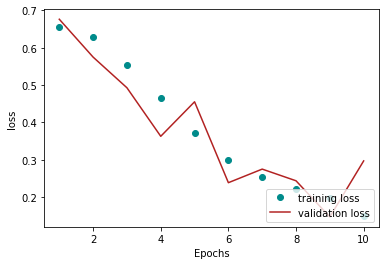

In [155]:
plt.figure()
epochs = np.arange(1, EPOCHS+1, 1)
plt.plot(epochs, history.history["loss"], marker = "o",  color = 'darkcyan', linestyle = '', label = "training loss")
plt.plot(epochs, history.history["val_loss"], color = 'firebrick', label = "validation loss")
#plt.axvline(best_epoch, ls = \"--\", color = \"black\", lw = 1)
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.legend(loc = "lower right")
plt.show()


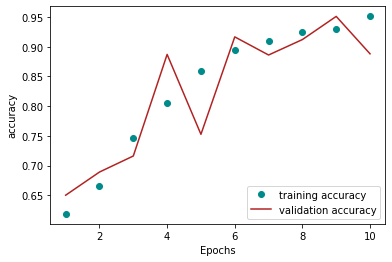

In [154]:
plt.figure()
epochs = np.arange(1, EPOCHS+1, 1)
plt.plot(epochs, history.history["acc"], marker = "o",  color = 'darkcyan', linestyle = '', label = "training accuracy")
plt.plot(epochs, history.history["val_acc"], color = 'firebrick', label = "validation accuracy")
#plt.axvline(best_epoch, ls = \"--\", color = \"black\", lw = 1)
plt.xlabel("Epochs")
plt.ylabel("accuracy")
plt.legend(loc = "lower right")
plt.show()



# Predictions

In [156]:
model.predict(images_test)

array([[0.0513587 ],
       [0.09339237],
       [0.9975451 ],
       ...,
       [0.09882152],
       [0.9837071 ],
       [0.45483384]], dtype=float32)